In [1]:
import numpy as np
import pandas as pd

from ast import literal_eval

import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams["grid.linestyle"] = "--"

plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.facecolor'] = "lavender"

In [661]:
columns_to_eval = [
    "global_mouse_position",
    "button_cooldown_times",
    "logical_frames_since_last_button_press",
    "global_position",
    "velocity",
    "fruits_cut_this_frame_list",
    "fruits_hit_ninjas_ass_this_frame_list",
    "fruits_on_screen_this_frame_list",
    "fruits_spawned_this_frame_list",
    "stupid_fucking_fruits_that_died_this_frame_list",
]

df = pd.read_csv("train_data/output.csv", converters={column: literal_eval for column in columns_to_eval})
df.head()

,cheat_flag,frame_count,session_id,combo,global_mouse_position,is_combo_going,logical_dt,phys_frames_since_last_combo,physical_dt,score,...,is_stunned,speed,velocity,fruits_cut_this_frame_list,fruits_hit_ninjas_ass_this_frame_list,fruits_on_screen_this_frame,fruits_on_screen_this_frame_list,fruits_spawned_this_frame_list,is_aiming,stupid_fucking_fruits_that_died_this_frame_list
0,0,1,1702382841,0,"[0, 0]",False,0.016667,1103,0.016667,0,...,False,100,"[0.0528810359537601, 1.66582763195038]",[],[],[],[],[],False,[]
1,0,2,1702382841,0,"[0, 0]",False,0.016667,1104,0.016667,0,...,False,100,"[0.173977315425873, 1.65756142139435]",[],[],[],[],[],False,[]
2,0,3,1702382841,0,"[0, 0]",False,0.016667,1105,0.016667,0,...,False,100,"[0.325032502412796, 1.63466572761536]",[],[],[],[],[],False,[]
3,0,4,1702382841,0,"[0, 0]",False,0.016667,1106,0.016667,0,...,False,100,"[0.186604306101799, 1.65618753433228]",[],[],[],[],[],False,[]
4,0,5,1702382841,0,"[0, 0]",False,0.016667,1107,0.016667,0,...,False,100,"[0.165572926402092, 1.6584221124649]",[],[],[],[],[],False,[]


In [662]:
df["fruits_spawned_num"] = df["fruits_spawned_this_frame_list"].str.len()
df["fruits_on_screen_num"] = df["fruits_on_screen_this_frame_list"].str.len()
df["fruits_hit_num"] = df["fruits_hit_ninjas_ass_this_frame_list"].str.len()
df["fruits_missed_num"] = df["stupid_fucking_fruits_that_died_this_frame_list"].str.len()

projectiles = ["Apple", "Banana", "Grape", "Pineapple", "Watermelon", "Coconut", "Cherry"]

df["fruit_name_spawned"] = df["fruits_spawned_this_frame_list"].apply(lambda x: projectiles.index(x[0]["name"]) if len(x) != 0 else -1)

for butt in ["b1", "b2", "b3", "b4"]:
    df[butt] = df["button_cooldown_times"].apply(lambda j: j[butt])

df.head()

,cheat_flag,frame_count,session_id,combo,global_mouse_position,is_combo_going,logical_dt,phys_frames_since_last_combo,physical_dt,score,...,stupid_fucking_fruits_that_died_this_frame_list,fruits_spawned_num,fruits_on_screen_num,fruits_hit_num,fruits_missed_num,fruit_name_spawned,b1,b2,b3,b4
0,0,1,1702382841,0,"[0, 0]",False,0.016667,1103,0.016667,0,...,[],0,0,0,0,-1,2.994089,2.493846,1.985482,1.477612
1,0,2,1702382841,0,"[0, 0]",False,0.016667,1104,0.016667,0,...,[],0,0,0,0,-1,2.994089,2.493846,1.985482,1.477612
2,0,3,1702382841,0,"[0, 0]",False,0.016667,1105,0.016667,0,...,[],0,0,0,0,-1,2.994089,2.493846,1.985482,1.477612
3,0,4,1702382841,0,"[0, 0]",False,0.016667,1106,0.016667,0,...,[],0,0,0,0,-1,2.994089,2.493846,1.985482,1.477612
4,0,5,1702382841,0,"[0, 0]",False,0.016667,1107,0.016667,0,...,[],0,0,0,0,-1,2.994089,2.493846,1.985482,1.477612


In [5]:
N = len(df)  # samples to generate
N

11182

In [6]:
synthetic_df = df.copy()[["cheat_flag", "frame_count", "session_id"]]
synthetic_df["session_id"] = 9_999_999_999 - synthetic_df["session_id"][::-1]
synthetic_df.head()

,cheat_flag,frame_count,session_id
0,0,1,8297617158
1,0,2,8297617158
2,0,3,8297617158
3,0,4,8297617158
4,0,5,8297617158


# is_combo_going

In [7]:
df["is_combo_going"].value_counts(normalize=True)

is_combo_going
False    0.521374
True     0.478626
Name: proportion, dtype: float64

In [8]:
success_prob = df["is_combo_going"].value_counts(normalize=True)[True]
success_prob

0.4786263637989626

In [9]:
synthetic_data = np.random.binomial(n=1, p=success_prob, size=N).astype(bool)
np.mean(synthetic_data)

0.4702199964228224

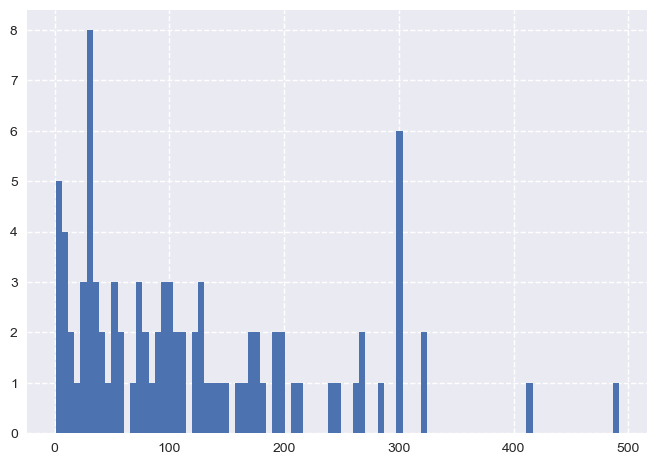

In [10]:
from itertools import groupby

def find_sequence_lengths(bool_array):
    lengths = [len(list(group)) for _, group in groupby(bool_array)]
    return lengths

bool_array = df["is_combo_going"].to_numpy().astype(int)
result = find_sequence_lengths(bool_array)

# print(result_dict)

plt.hist(result, bins=len(result));

In [11]:
from hmmlearn import hmm

training_data = df["is_combo_going"].values

training_data_numeric = training_data.astype(int).reshape(-1, 1)

model = hmm.CategoricalHMM(n_components=10, n_iter=1_000)
model.fit(training_data_numeric)

num_samples = len(training_data)

In [12]:
a = find_sequence_lengths(training_data)
a[:10], len(a)

([123, 300, 110, 107, 67, 127, 30, 26, 29, 89], 91)

In [13]:
synthetic_sequence, _ = model.sample(n_samples=num_samples)
synthetic_sequence = (synthetic_sequence.flatten() == 1)

b = find_sequence_lengths(synthetic_sequence)
b[:10], len(b)

([173, 132, 482, 35, 436, 39, 112, 210, 4, 76], 69)

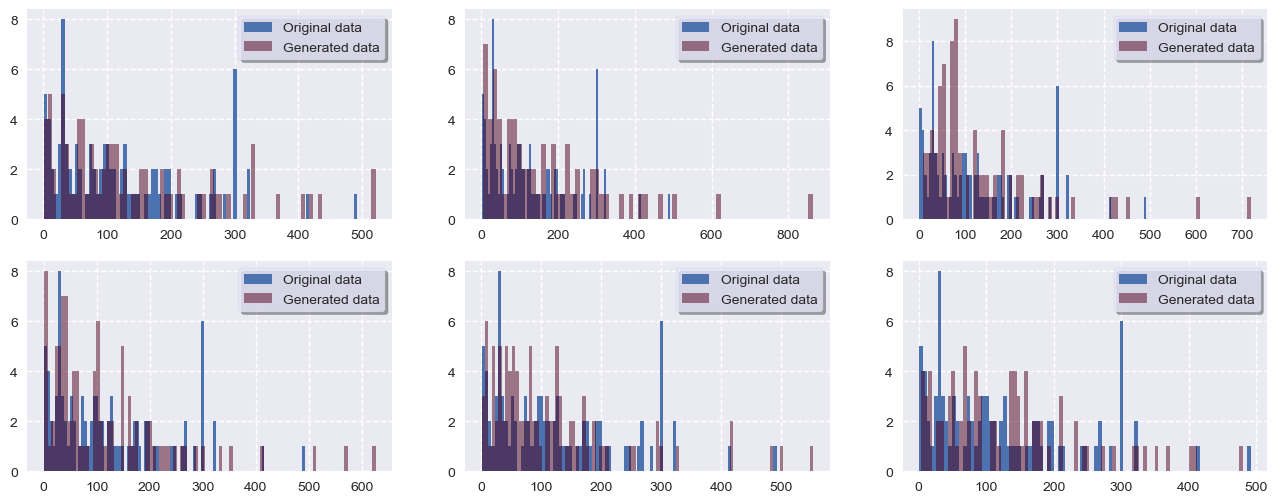

In [14]:
# plt.hist(a, label="Original data", bins=len(a))

rows, cols = 2, 3

plt.figure(figsize=(16, 6))

a = find_sequence_lengths(training_data)

for i in range(1, rows * cols + 1):
    synthetic_sequence, _ = model.sample(n_samples=N)
    synthetic_sequence = (synthetic_sequence.flatten() == 1)
    b = find_sequence_lengths(synthetic_sequence)
    # print(b)
    # b = np.digitize(b, np.arange(0, np.max(a), len(a)))
    # print(b)

    plt.subplot(rows, cols, i)
    plt.hist(a, label="Original data", bins=len(a))
    plt.hist(b, color=(0.3, 0, 0.1, 0.5), label="Generated data", bins=len(b))
    plt.legend()

plt.show()

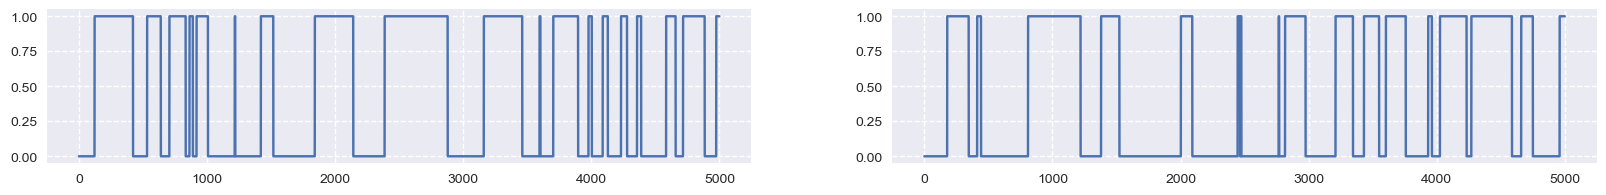

In [15]:
plt.figure(figsize=(20, 2))

plt.subplot(1, 2, 1)
plt.plot(training_data.astype(int)[:5000])

plt.subplot(1, 2, 2)
plt.plot(synthetic_sequence.astype(int)[:5000]);

In [16]:
synthetic_df["is_combo_going"] = synthetic_sequence
synthetic_df.head()

,cheat_flag,frame_count,session_id,is_combo_going
0,0,1,8297617158,False
1,0,2,8297617158,False
2,0,3,8297617158,False
3,0,4,8297617158,False
4,0,5,8297617158,False


# combo

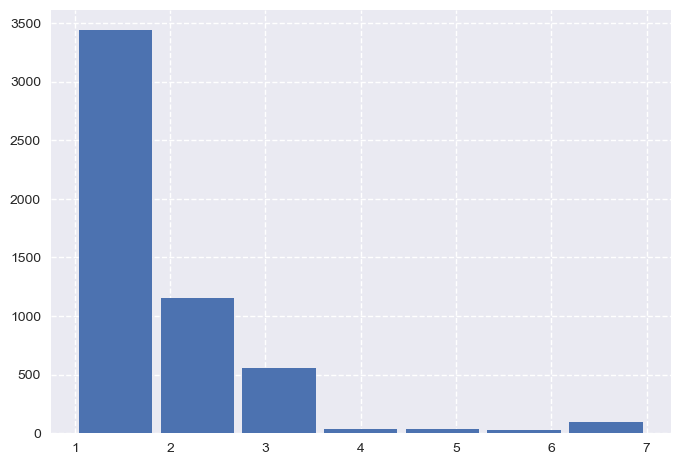

In [17]:
nonzero_combo = df[df["is_combo_going"] == True]["combo"]
plt.hist(nonzero_combo, rwidth=0.9, bins=nonzero_combo.max());

In [18]:
combo_probs = nonzero_combo.value_counts(normalize=True)
combo_probs.sort_index()

combo
1    0.642750
2    0.215994
3    0.104634
4    0.006353
5    0.007287
6    0.005605
7    0.017377
Name: proportion, dtype: float64

In [19]:
k = np.random.normal(1, 0.1, len(combo_probs))
a = combo_probs.values + 0.0005 / combo_probs.values * k
a = a / np.sum(a)
a

array([0.50012671, 0.16991548, 0.08503913, 0.03724597, 0.05652723,
       0.07124999, 0.07989549])

In [20]:
np.random.choice(combo_probs.index.values, 10, p=combo_probs.values)

array([2, 1, 2, 1, 1, 1, 2, 1, 1, 7])

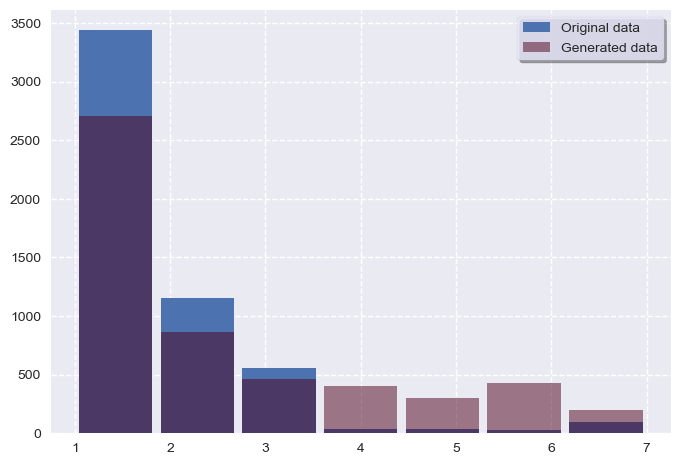

In [21]:
synthetic_data = np.random.choice(combo_probs.index.values, len(nonzero_combo), p=a)
plt.hist(nonzero_combo, rwidth=0.9, label="Original data", bins=nonzero_combo.max())
plt.hist(synthetic_data, rwidth=0.9, color=(0.3, 0, 0.1, 0.5), label="Generated data", bins=nonzero_combo.max())
plt.legend();

In [22]:
combo_num = len(find_sequence_lengths(synthetic_sequence)) // 2
combo_num

42

In [23]:
synthetic_combo = np.random.choice(combo_probs.index.values, combo_num, p=a)
synthetic_combo
# synthetic_combo_unraveled = list(map(lambda x: [x[0]] * x[1], zip(synthetic_combo, find_sequence_lengths(synthetic_sequence))))
# synthetic_combo_flattened = sum(synthetic_combo_unraveled, [])
#
# synthetic_df["combo"] = 0
# synthetic_df[synthetic_df["is_combo_going"]]["combo"] = synthetic_combo_flattened
# synthetic_df

array([6, 1, 1, 1, 1, 1, 1, 1, 2, 4, 7, 6, 1, 5, 1, 3, 1, 1, 1, 1, 1, 6,
       1, 5, 4, 5, 3, 1, 1, 4, 3, 1, 3, 2, 2, 4, 2, 1, 1, 4, 1, 4])

# fruits_spawned_num

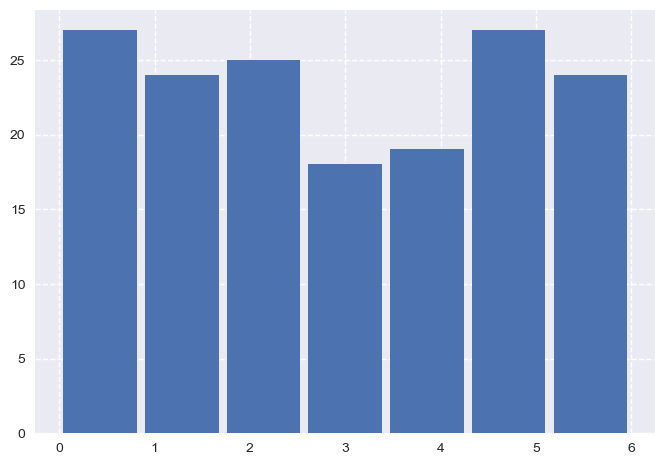

In [24]:
plt.hist(df[df["fruit_name_spawned"] != -1]["fruit_name_spawned"], rwidth=0.9, bins=len(projectiles));

In [25]:
fruit_prob = df["fruits_spawned_num"].value_counts(normalize=True).sort_index()
fruit_prob

fruits_spawned_num
0    0.985334
1    0.014666
Name: proportion, dtype: float64

In [26]:
k = 0.1 * np.random.rand(1)[0]
k

0.02519869135894518

In [27]:
fruit_prob[0] - k, fruit_prob[1] + k

(0.9601348804528953, 0.03986511954710473)

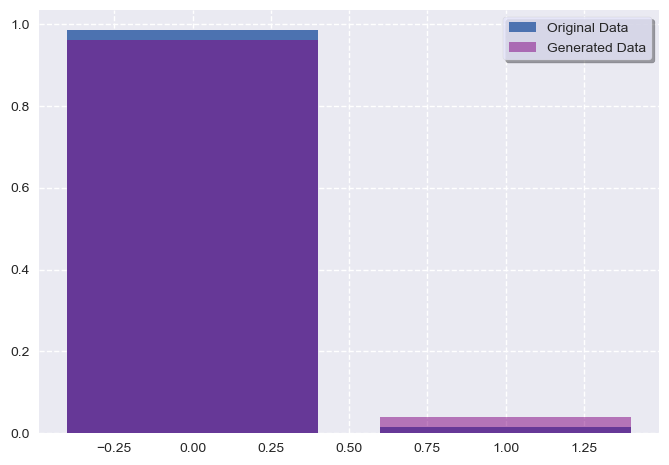

In [28]:
plt.bar(fruit_prob.index, height=fruit_prob.values, label="Original Data")
plt.bar(fruit_prob.index, height=[fruit_prob[0] - k, fruit_prob[1] + k], alpha=0.5, color="purple", label="Generated Data")
plt.legend();

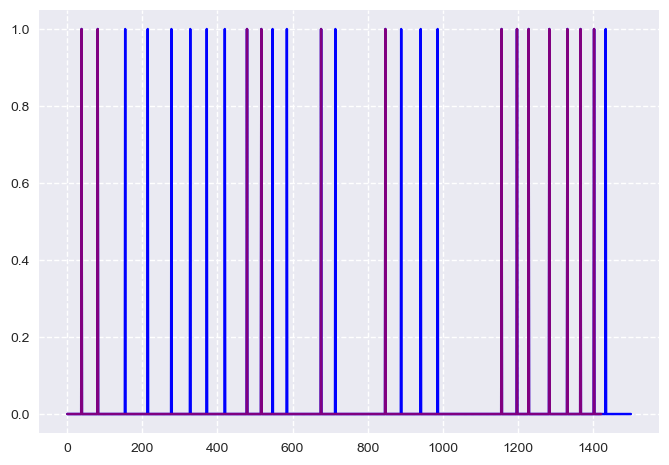

In [29]:
L = 1500
chunk = df[(df["frame_count"] < L + 1) & (df["session_id"] == 1702382841)]

plt.plot(chunk["frame_count"], chunk["fruits_spawned_num"], c="blue", label="No combo")
plt.plot(chunk[chunk["is_combo_going"] == False]["frame_count"], chunk[chunk["is_combo_going"] == False]["fruits_spawned_num"], c="purple", label="Is combo")


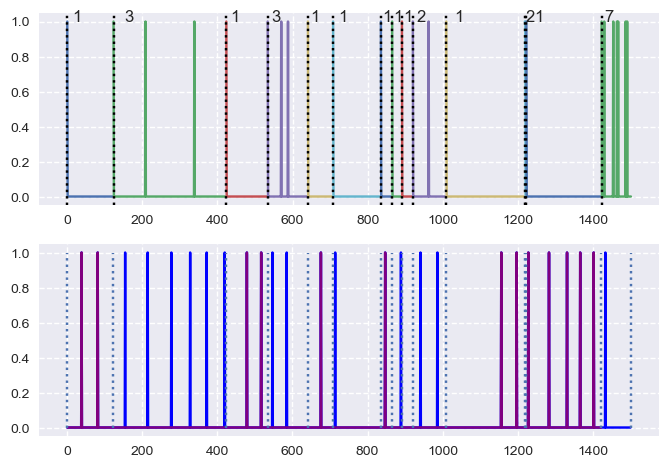

In [30]:
last_tick = 1

plt.subplot(2, 1, 1)
for seq in find_sequence_lengths(chunk["is_combo_going"]):
    # a = np.random.normal(0, 1, 30)
    # print(a)
    # a = np.digitize(a, bins=[0])
    # print(a)

    combos = chunk.iloc[last_tick : last_tick + seq]["combo"].max()

    if combos == 0:
        continue

    ccc = np.zeros(seq)

    if combos != 1:
        chunk_size = seq // combos
        splitted = np.clip([int(i * chunk_size + np.random.normal(0, 10)) for i in range(1, combos)], 1, seq - 1)
        ccc[splitted] = 1

    ccc[0] = 1

    plt.plot(np.arange(last_tick, last_tick + seq, 1), ccc)

    plt.axvline(last_tick, ls=":", c="black")
    plt.text(0.1 * seq + last_tick, 1, str(combos), size=12)

    last_tick += seq


plt.subplot(2, 1, 2)
plt.plot(chunk["frame_count"], chunk["fruits_spawned_num"], c="blue", label="No combo")
plt.plot(chunk[chunk["is_combo_going"] == False]["frame_count"], chunk[chunk["is_combo_going"] == False]["fruits_spawned_num"], c="purple", label="Is combo")
plt.vlines(np.cumsum([1] + find_sequence_lengths(chunk["is_combo_going"])), 0, 1, ls=":")

In [31]:
synth_chunks = find_sequence_lengths(synthetic_sequence)
synth_chunks[:10]

[179, 168, 66, 30, 367, 410, 160, 143, 480, 89]

In [32]:
last_tick = 0
synthetic_combo_unraveled = []

is_combo = False

for i, seq in enumerate(synth_chunks):
    if is_combo:
        combos = synthetic_combo[i // 2]
        ccc = np.ones(seq, dtype=int)

        if combos != 1:
            chunk_size = seq // combos
            splitted = np.clip([int(i * chunk_size + np.random.normal(0, 10)) for i in range(1, combos)], 1, seq - 1)

            for s_i in splitted:
                ccc[s_i:] += 1

        synthetic_combo_unraveled.extend(ccc)

        # plt.plot(np.arange(last_tick, last_tick + seq, 1), ccc)

    last_tick += seq

    is_combo = not is_combo


In [33]:
# synthetic_combo_unraveled = list(map(lambda x: [x[0]] * x[1], zip(synthetic_combo, find_sequence_lengths(synthetic_sequence))))
# synthetic_combo_flattened = sum(synthetic_combo_unraveled, [])
#
synthetic_df["combo"] = 0
synthetic_df.loc[synthetic_df["is_combo_going"], "combo"] = synthetic_combo_unraveled
synthetic_df

,cheat_flag,frame_count,session_id,is_combo_going,combo
0,0,1,8297617158,False,0
1,0,2,8297617158,False,0
2,0,3,8297617158,False,0
3,0,4,8297617158,False,0
4,0,5,8297617158,False,0
...,...,...,...,...,...
11177,0,56,8297616543,True,4
11178,0,57,8297616543,True,4
11179,0,58,8297616543,True,4
11180,0,59,8297616543,True,4


# score

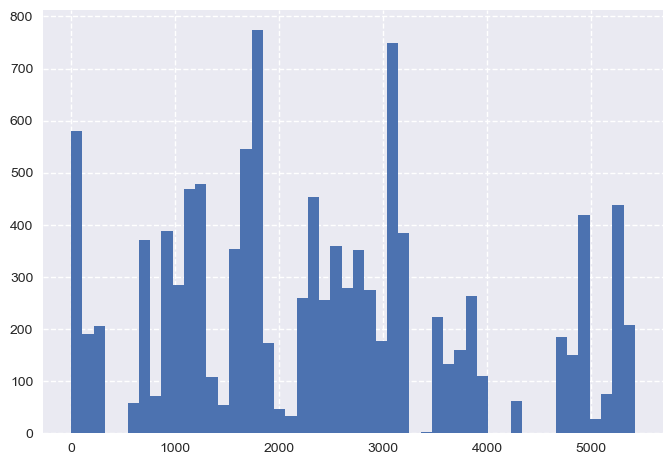

In [34]:
plt.hist(df["score"], bins=50);

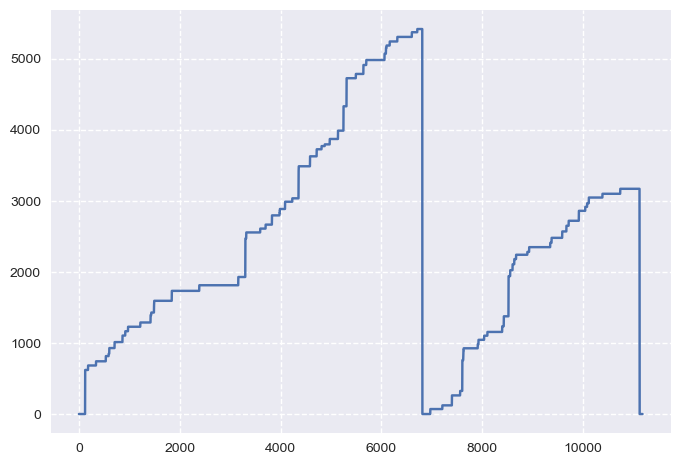

In [35]:
plt.plot(df["score"])

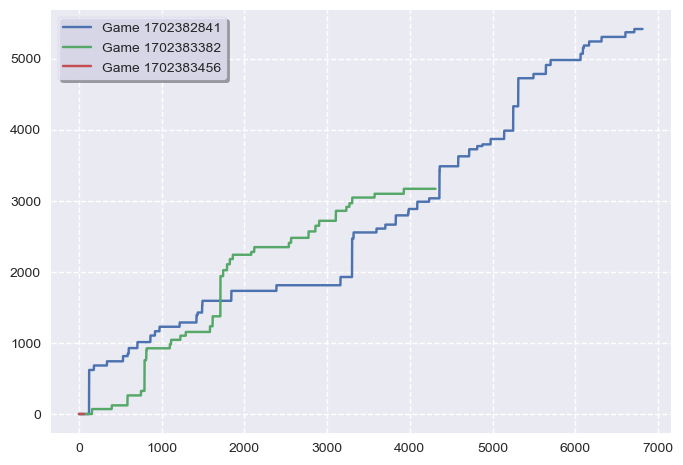

In [109]:
x = []
y = []

df_groups = df.groupby("session_id")
for g in df_groups.groups:
    group = df_groups.get_group(g)
    plt.plot(group["frame_count"], group["score"], label=f"Game {group.iloc[0]['session_id']}")

    x.extend(group["frame_count"])
    y.extend(group["score"])
plt.legend()

x = np.array(x)
y = np.array(y)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


c = np.rec.fromarrays([x, y])
c.sort()
xm, ym = c["f0"], c["f1"]

xm = xm.reshape(-1, 1)

model = LinearRegression()
model.fit(xm, ym)
model.score(xm, ym)

0.9561229953266925

In [173]:
def generate_noise(y_values, num_segments=100, max_step_height=100, noise_std=2):
    staircase_noise = np.zeros_like(y_values)

    for i in range(num_segments):
        start = int(i * len(y_values) / num_segments)
        end = int((i + 1) * len(y_values) / num_segments)
        staircase_noise[start:end] = max_step_height * np.random.normal(0, noise_std)

    return staircase_noise

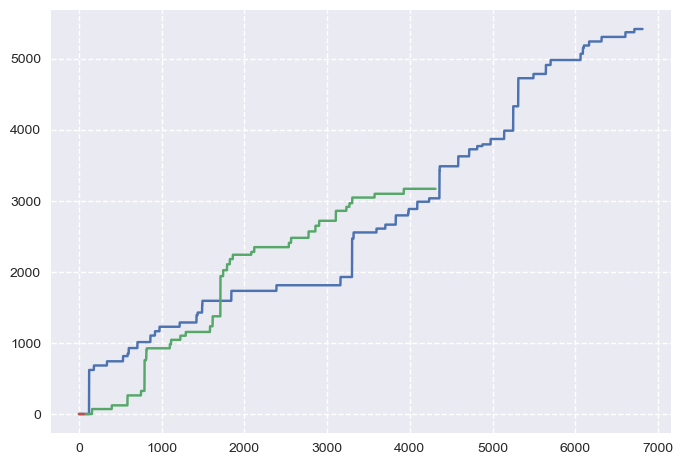

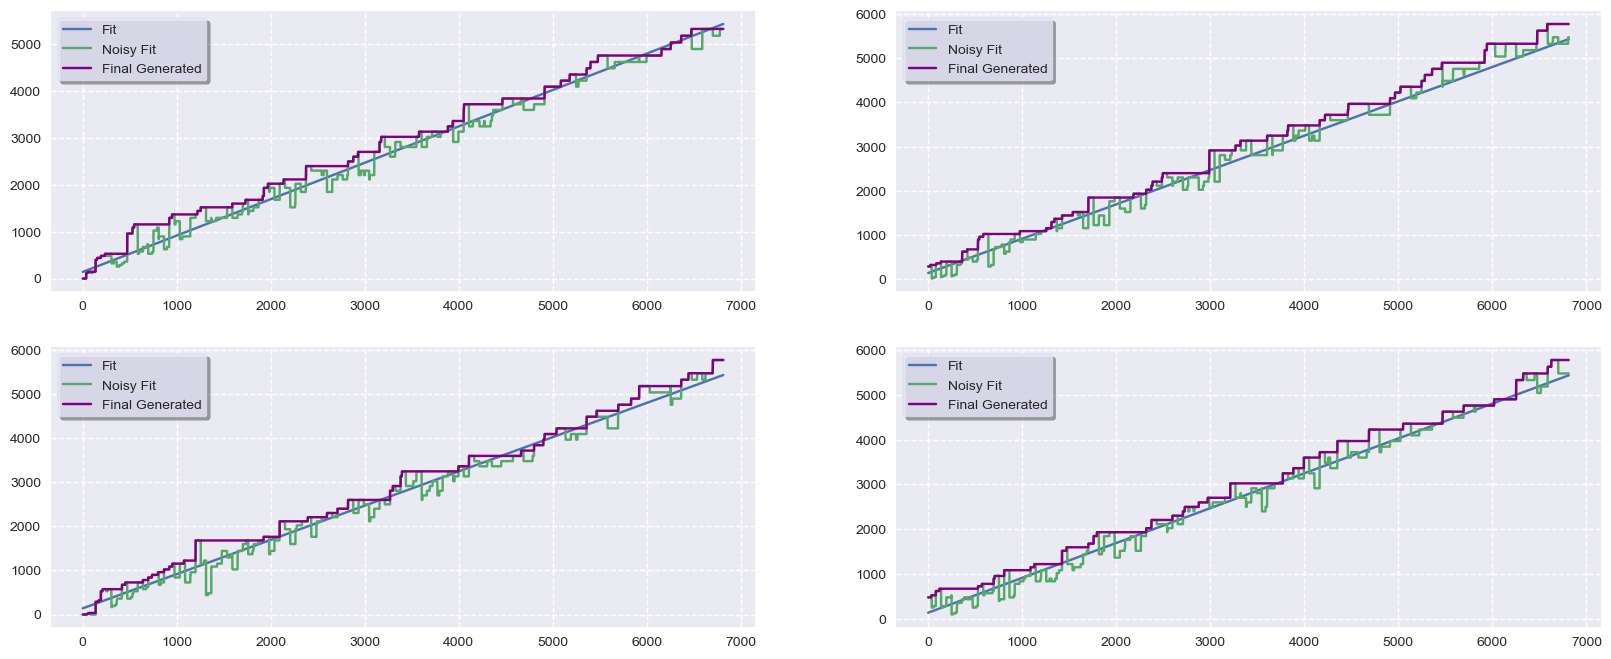

In [358]:
fitted = model.predict(xm)

for g in df_groups.groups:
    group = df_groups.get_group(g)
    plt.plot(group["frame_count"], group["score"], label=f"Game {group.iloc[0]['session_id']}")
plt.show()


plt.figure(figsize=(20, 8))
rows, cols = 2, 2
for i in range(1, rows * cols + 1):
    plt.subplot(rows, cols, i)
    plt.plot(xm, fitted, label="Fit")

    noise = generate_noise(fitted)

    noisy_fit = fitted + noise
    bins = np.linspace(0, 200, 200, dtype=int) ** 2
    bins_idx = np.digitize(noisy_fit, bins)
    noisy_fit = bins[bins_idx]

    plt.plot(xm, noisy_fit, label="Noisy Fit")

    for i, (curr, nex) in enumerate(zip(noisy_fit, noisy_fit[1:] + [0])):
        v = int(max(curr, nex))
        noisy_fit[i+1] = v

    plt.plot(xm, noisy_fit, label="Final Generated", color="purple")
    plt.legend()


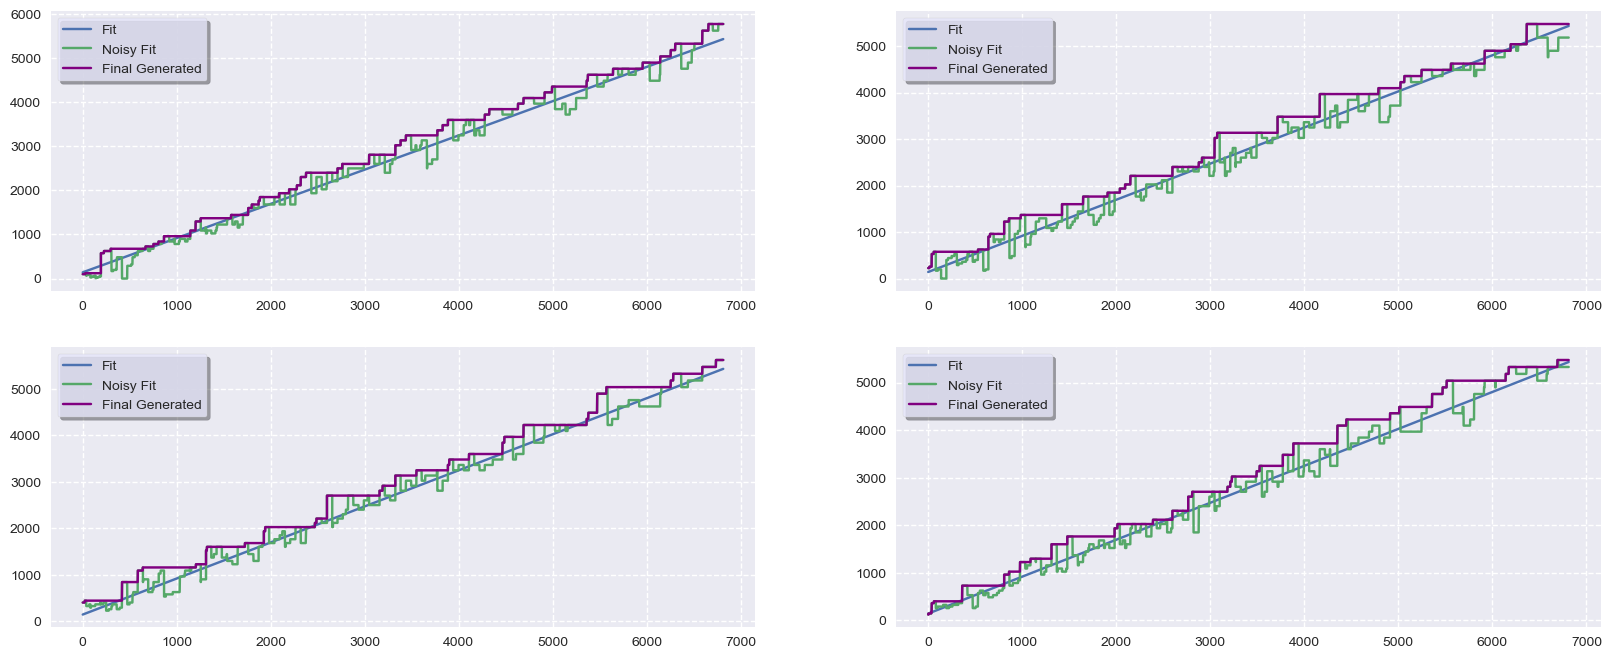

In [360]:
plt.figure(figsize=(20, 8))
rows, cols = 2, 2
for i in range(1, rows * cols + 1):
    plt.subplot(rows, cols, i)
    plt.plot(xm, fitted, label="Fit")

    noise = generate_noise(fitted)

    noisy_fit = fitted + noise
    bins = np.linspace(0, 200, 200, dtype=int) ** 2
    bins_idx = np.digitize(noisy_fit, bins)
    noisy_fit = bins[bins_idx]

    plt.plot(xm, noisy_fit, label="Noisy Fit")

    for i, (curr, nex) in enumerate(zip(noisy_fit, noisy_fit[1:] + [0])):
        v = int(max(curr, nex))
        noisy_fit[i+1] = v

    plt.plot(xm, noisy_fit, label="Final Generated", color="purple")

    plt.legend()

In [505]:
synthetic_df["score"] = noisy_fit
synthetic_df

,cheat_flag,frame_count,session_id,is_combo_going,combo,score
0,0,1,8297617158,False,0,121
1,0,2,8297617158,False,0,121
2,0,3,8297617158,False,0,121
3,0,4,8297617158,False,0,121
4,0,5,8297617158,False,0,121
...,...,...,...,...,...,...
11177,0,56,8297616543,True,4,5476
11178,0,57,8297616543,True,4,5476
11179,0,58,8297616543,True,4,5476
11180,0,59,8297616543,True,4,5476


# time_left_sec

-0.7317592701339025


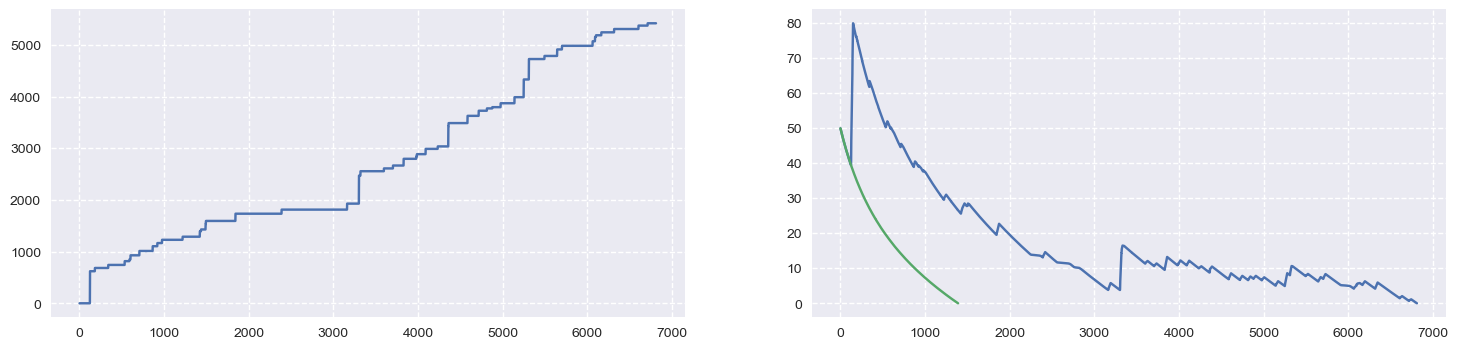

-0.9186445618835802


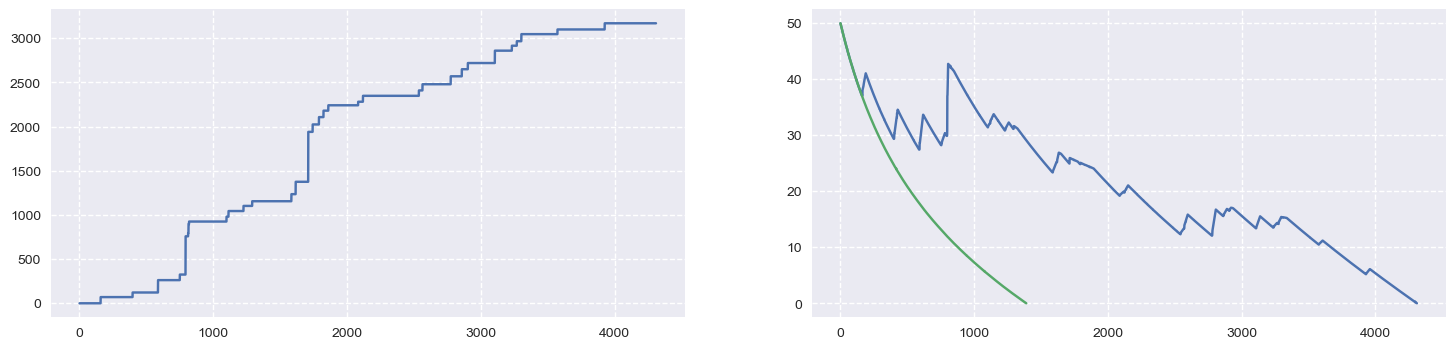

nan


/Users/alorthius/anaconda3/envs/big_data/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alorthius/anaconda3/envs/big_data/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


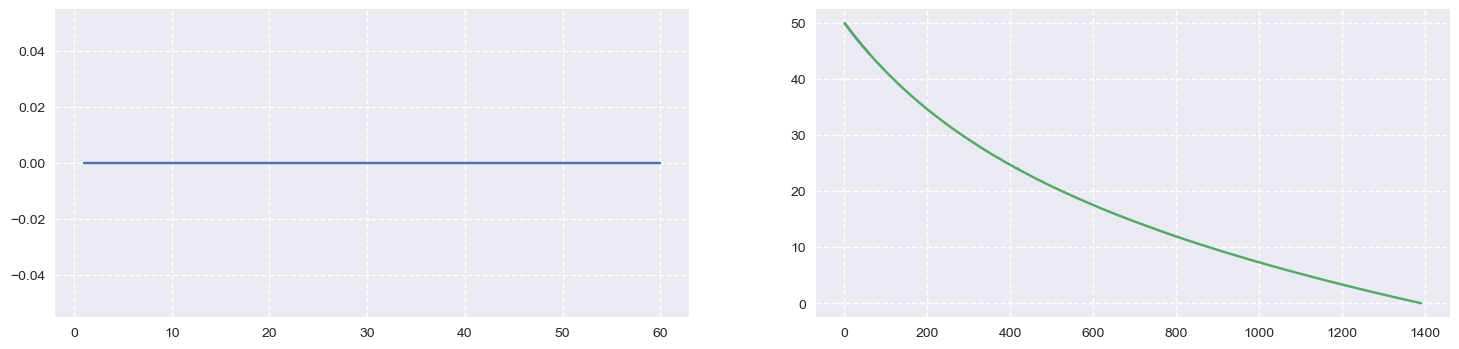

In [554]:
df_still = pd.read_csv("train_data/still.csv")

df_groups = df.groupby("session_id")

x1 = []
x2 = []
x3 = []
y = []

for g in df_groups.groups:
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 2, 1)
    group = df_groups.get_group(g)
    plt.plot(group["frame_count"], group["score"], label=f"Game {group.iloc[0]['session_id']}")

    plt.subplot(1, 2, 2)
    plt.plot(group["frame_count"], group["time_left_seconds"], label=f"Game {group.iloc[0]['session_id']}")
    plt.plot(df_still["frame_count"], df_still["time_left_seconds"])

    # damage_i = group["score"].values
    # damage_i_next = group["score"].shift(1).fillna(0).values
    # damage_estimate = np.abs(damage_i - damage_i_next)
    # t = 500 * np.ones(len(group),)
    # for i, t_curr in enumerate(t):
    #     if i+1 == len(t):
    #         break
    #     t_left = t_curr - 0.1 * (1.0 / 60 * group["time_scalar"][i] + damage_estimate[i] * group["combo"][i])
    #     if t_left <= 1:
    #         t[i + 1] = max(t[i], t[i])
    #         # print(i, t[i], t[i+1], t_left)
    #     t[i + 1] = t_left

    # plt.plot(t, c="red")
    cor = group["score"].corr(df["time_left_seconds"])
    print(cor)

    x1.append(group["frame_count"])
    x2.append(group["combo"])
    x3.append(group["score"])
    y.append(group["time_left_seconds"])

    plt.show()


In [555]:
import itertools

xm = []

for x in [x1, x2, x3]:
    max_length = max(len(sublist) for sublist in x)
    d_x = {i: [] for i in range(max_length)}
    for sub in x:
        for i, e in enumerate(sub):
            d_x[i].append(e)

    xm.append(np.array(list(itertools.chain(*d_x.values()))))
xm = np.array(xm)

max_length = max(len(sublist) for sublist in y)
d_y = {i: [] for i in range(max_length)}
for sub in y:
    for i, e in enumerate(sub):
        d_y[i].append(e)

ym = np.array(list(itertools.chain(*d_y.values())))

In [567]:
xm.T.shape, ym.shape

((11182, 3), (11182,))

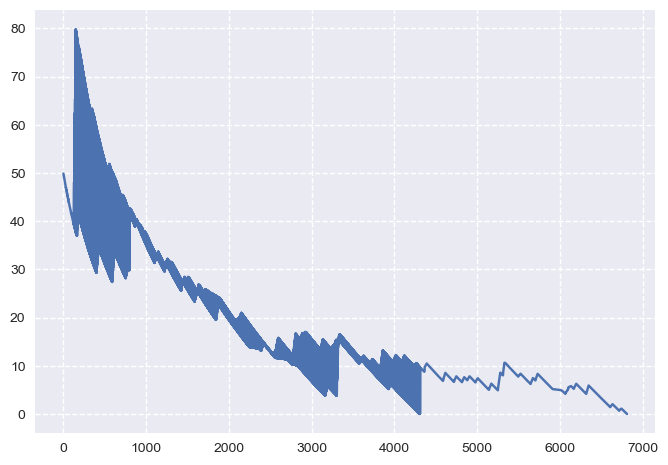

In [557]:
plt.plot(xm[0], ym)

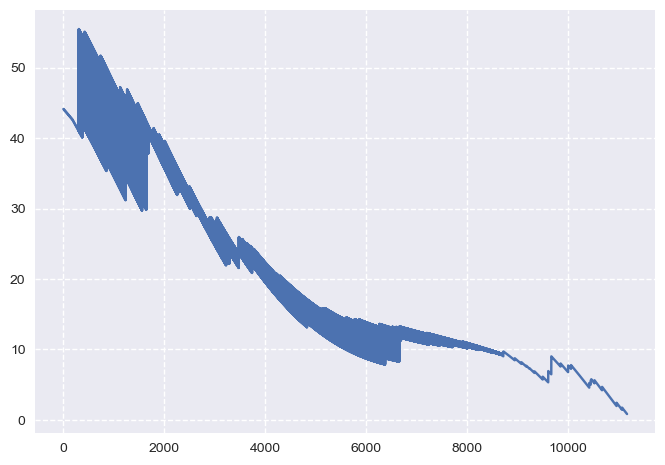

In [571]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR

# reg = GaussianProcessRegressor()
reg = SVR(kernel='rbf')
reg.fit(xm.T, ym)

pred = reg.predict(xm.T)
plt.plot(pred)

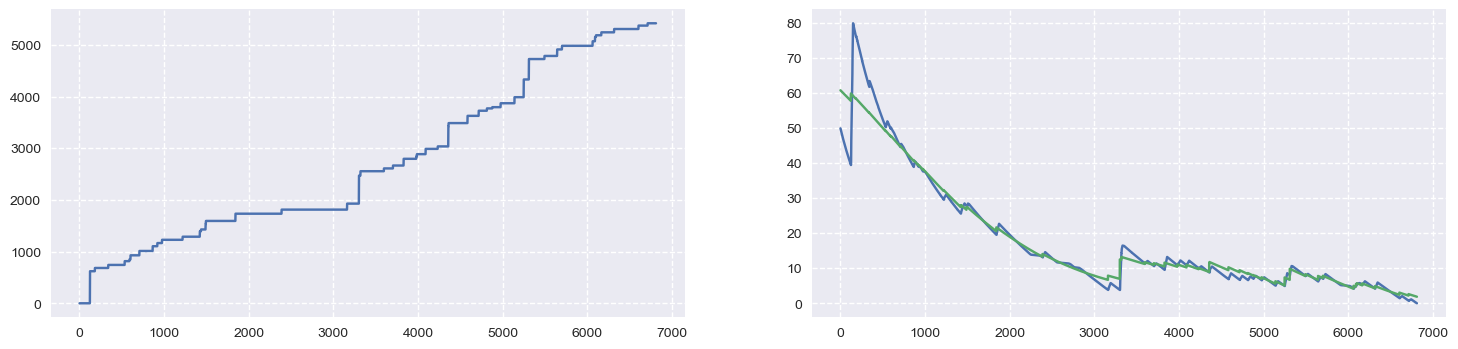

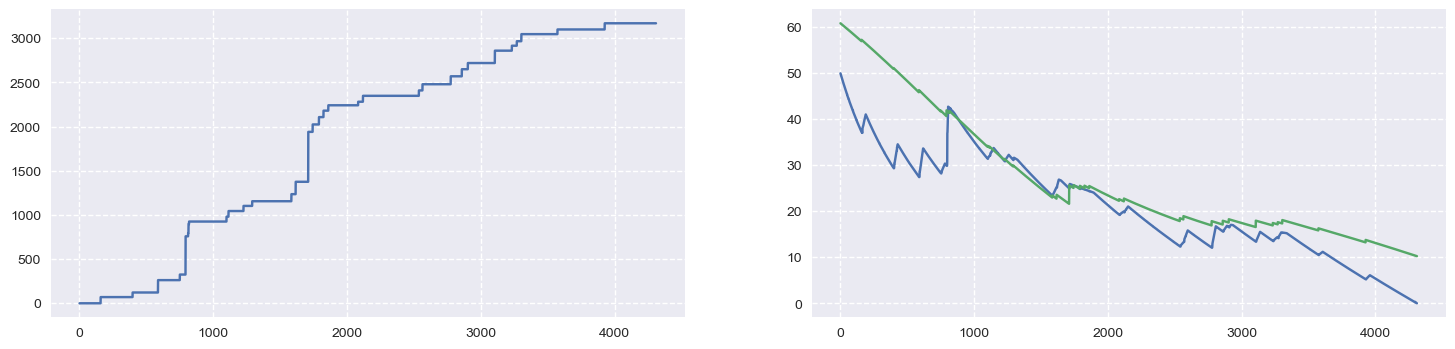

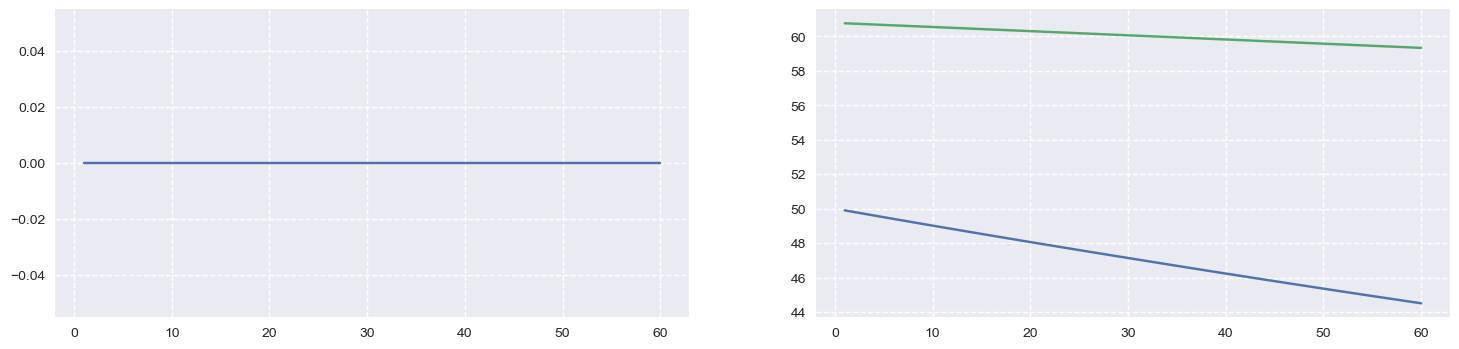

In [586]:
df_groups = df.groupby("session_id")

reg = SVR(kernel='rbf')

for g in df_groups.groups:
    group = df_groups.get_group(g)
    X = np.array([group["frame_count"], group["score"], group["combo"]])
    reg.fit(X.T, group["time_left_seconds"])
    break


for g in df_groups.groups:
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 2, 1)
    group = df_groups.get_group(g)
    plt.plot(group["frame_count"], group["score"], label=f"Game {group.iloc[0]['session_id']}")

    plt.subplot(1, 2, 2)
    plt.plot(group["frame_count"], group["time_left_seconds"], label=f"Game {group.iloc[0]['session_id']}")

    X = np.array([group["frame_count"], group["score"], group["combo"]])
    pred = reg.predict(X.T)
    plt.plot(group["frame_count"], pred, label=f"Fit")

    plt.show()


In [600]:
def predict_time_left(group):
    X = np.array([group["frame_count"], group["score"], group["combo"]])
    pred = reg.predict(X.T)
    last = int(5 * len(pred) / 10)
    weights = 0.5 * (1 - np.cos(np.linspace(0, np.pi, len(pred) - last)))
    pred[last:] = pred[last:] * (1-weights)
    return pred

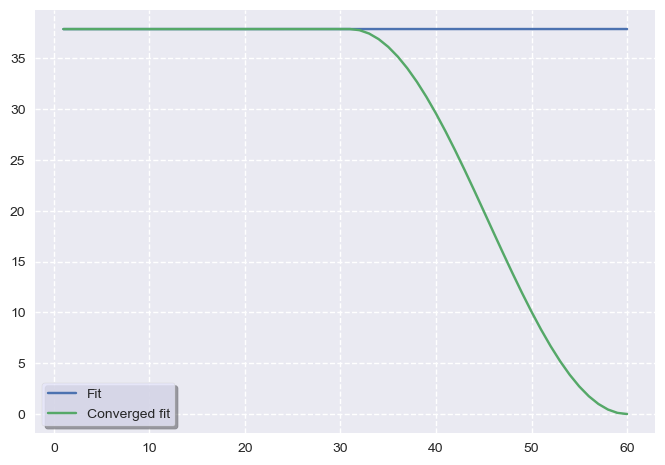

/var/folders/br/pkbj6n1x4631dn3pbjc2plgc0000gn/T/ipykernel_96261/799699071.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[37.88658491 37.8866807  37.88677606 37.886871   37.88696551 37.88705961
 37.88715328 37.88724653 37.88733936 37.88743177 37.88752376 37.88761534
 37.88770649 37.88779722 37.88788753 37.88797743 37.88806691 37.88815597
 37.88824462 37.88833285 37.88842067 37.88850807 37.88859505 37.88868162
 37.88876778 37.88885353 37.88893886 37.88902378 37.88910828 37.88919238
 37.88927606 37.77830481 37.44652515 36.89782642 36.1386412  35.17786984
 34.02677619 32.69885547 31.20967616 29.57669738 27.81906428 25.95738353
 24.01348178 22.01014973 19.97087494 17.91956647 15.88027455 13.87690863
 11.93295706 10.07121168  8.31350063  6.68043243  5.19115432  3.86312783
  2.71192398  1.75104079  0.99174493  0.44293972  0.11106066  0.        ]' has dtype incompatible with int64, please explicitly cast to a compa

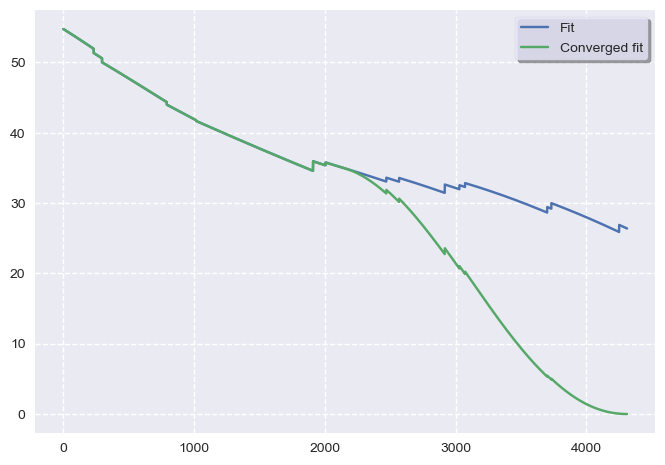

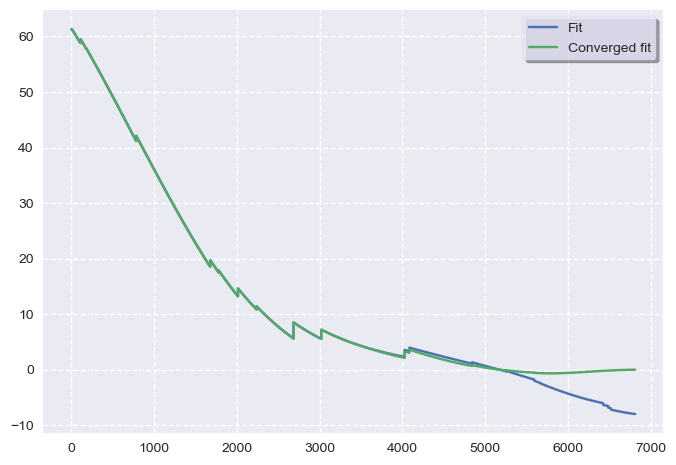

In [641]:
synthetic_df["time_left"] = 0

synth_groups = synthetic_df.groupby("session_id", as_index=False)
for g in synth_groups.groups:
    group = synth_groups.get_group(g)

    X = np.array([group["frame_count"], group["score"], group["combo"]])
    pred = reg.predict(X.T)
    plt.plot(group["frame_count"], pred, label=f"Fit")
    #
    vector = predict_time_left(group)

    plt.plot(group["frame_count"], vector, label=f"Converged fit")

    plt.legend()
    plt.show()

    # print(synthetic_df.iloc[group.index, :]["time_left"])
    # break

    synthetic_df.loc[group.index, "time_left"] = vector
    # print(vector)
    # break


In [643]:
synthetic_df

,cheat_flag,frame_count,session_id,is_combo_going,combo,score,time_left
0,0,1,8297617158,False,0,121,61.335397
1,0,2,8297617158,False,0,121,61.311240
2,0,3,8297617158,False,0,121,61.287074
3,0,4,8297617158,False,0,121,61.262897
4,0,5,8297617158,False,0,121,61.238709
...,...,...,...,...,...,...,...
11177,0,56,8297616543,True,4,5476,1.751041
11178,0,57,8297616543,True,4,5476,0.991745
11179,0,58,8297616543,True,4,5476,0.442940
11180,0,59,8297616543,True,4,5476,0.111061


# Buttons cd

In [676]:
b1_p = len(df[np.isclose(df["b1"], 3)]) / len(df)
b1_p

0.013503845465927384

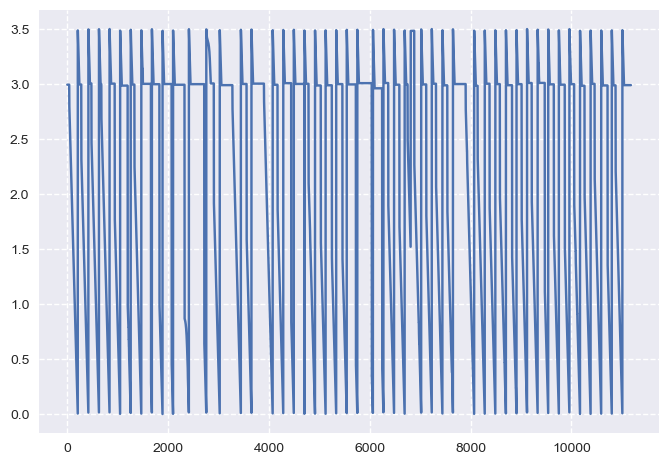

In [677]:
plt.plot(df["b1"])

In [678]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

Amplitude=1.1873916536216496, Angular freq.=0.029523012756199427, phase=0.21163143925638409, offset=1.8341978110197725, Max. Cov.=0.002098191705012424


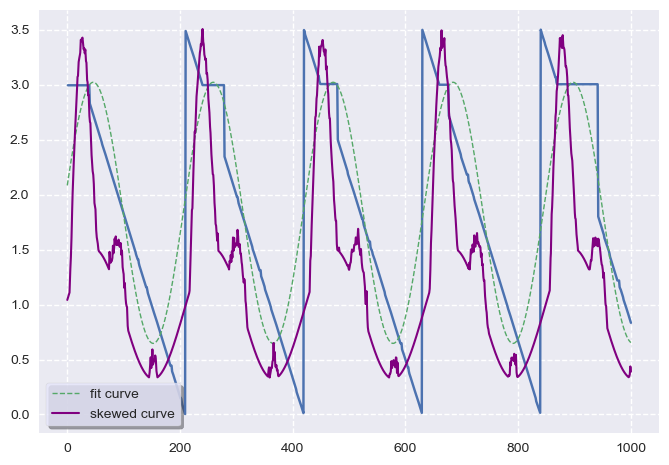

In [924]:
# N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3

tt = df["frame_count"][:1000]
tt2 = np.linspace(0, max(tt), 10*1000)
yynoise = df["b1"][:1000]

res = fit_sin(tt, yynoise)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

# plt.plot(tt, yy, "-k", label="y", linewidth=2)
# plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt, yynoise)

fitted_sine = res["fitfunc"](tt2)
noisy_fitted = np.clip(np.sum([res["amp"] * np.sin(res["omega"] * k * tt - res["phase"]) for k in range(0, 4, 1)], axis=0) + np.abs(np.random.normal(0, 0.1, len(tt))), 0, 3.5)

plt.plot(tt2, fitted_sine, label="fit curve", linewidth=1, ls="--")
# plt.plot(tt, noisy_fitted, label="y fit noisy", linewidth=1, ls="--")

from scipy.interpolate import interp1d
linear_interpolation = interp1d(tt, noisy_fitted, kind='linear', fill_value='extrapolate')
interpolated_array = np.clip(linear_interpolation(tt2), 0, 3.5)
# plt.plot(tt2, interpolated_array, label="y fit noisy", linewidth=1, ls="--")

plt.plot(tt2, np.mean([fitted_sine, 1.5 * interpolated_array], axis=0), label="skewed curve", lw=1.5, c="purple")


plt.legend(loc="best")
plt.show()


# can_dash

can_dash
False    0.89349
True     0.10651
Name: proportion, dtype: float64

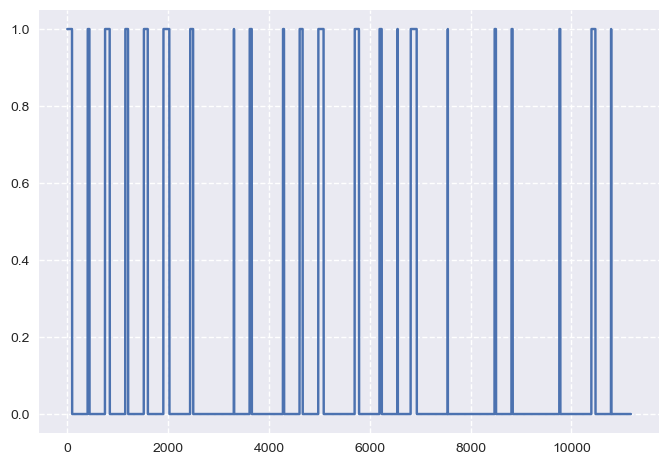

In [822]:
plt.plot(df["can_dash"])
df["can_dash"].value_counts(normalize=True)

In [841]:
dash_seq = find_sequence_lengths(df["can_dash"])

mean_dash_available = int(np.mean(dash_seq[::2]))
mean_dash_available

54

In [946]:
np.mean(dash_seq[::2]) / np.mean(dash_seq[1::2])

0.11920728655790211

In [862]:
mean_dash_available / (np.sum(dash_seq))

0.004829189769272045

(array([3., 1., 0., 3., 1., 1., 0., 2., 0., 2., 1., 0., 0., 2., 1., 2., 0.,
        1., 0., 2.]),
 array([  1.  ,   6.95,  12.9 ,  18.85,  24.8 ,  30.75,  36.7 ,  42.65,
         48.6 ,  54.55,  60.5 ,  66.45,  72.4 ,  78.35,  84.3 ,  90.25,
         96.2 , 102.15, 108.1 , 114.05, 120.  ]),
 <BarContainer object of 20 artists>)

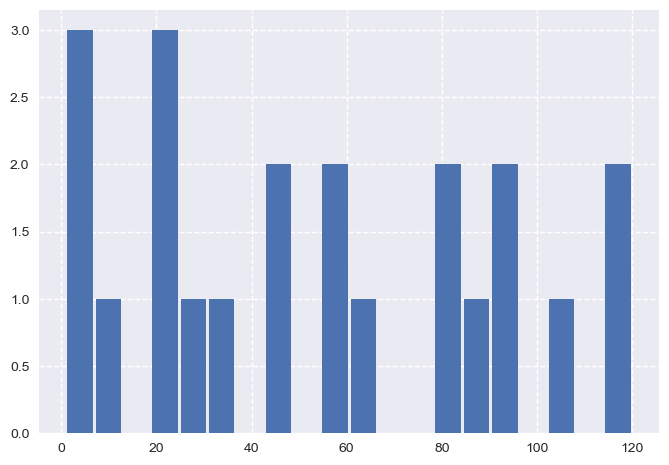

In [849]:
plt.hist(dash_seq[::2], bins=20, rwidth=0.9)

In [857]:
can_dash_synth = np.zeros((N, ), dtype=int)
# l = int(np.random.uniform(1, 2 * mean_dash_available))
# can_dash_synth[:l] = 1

l = 0
for i in range(N):
    if np.random.rand() < 0.15:
        l = int(np.random.uniform(1, 2 * mean_dash_available))
        # print(l)
        can_dash_synth[i : i + l] = 1
        i += l

can_dash_synth

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([0, 0, 0, ..., 1, 1, 1])

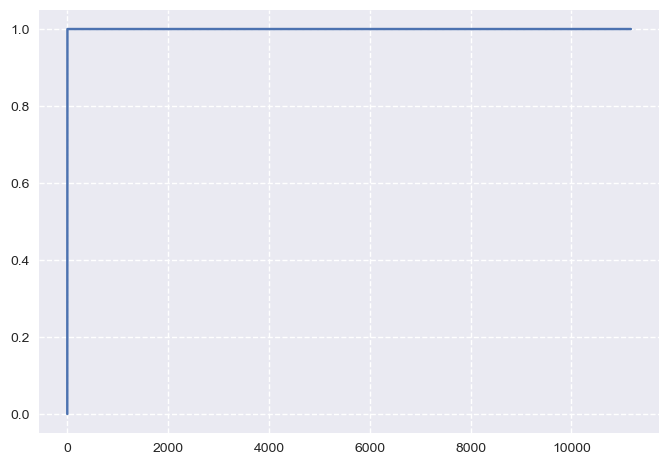

In [855]:
plt.plot(can_dash_synth)

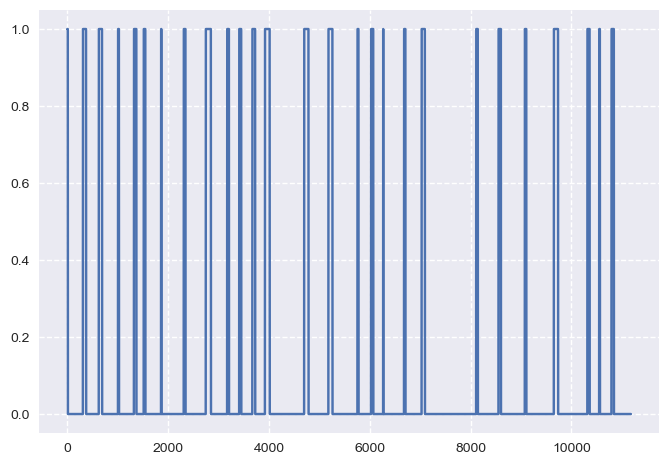

In [1012]:
import numpy as np

def generate_boolean_sequence(length, probability, duration_range):
    boolean_sequence = np.zeros((length,), dtype=int)

    i = 0
    while i < len(boolean_sequence):
        if np.random.rand() < probability:
            duration = np.random.randint(*duration_range)
            boolean_sequence[i:i+duration] = 1
            i += duration
            i += np.random.randint(120, 200)
        else:
            i += 1

    # game begins with dash available
    start_l = np.random.randint(*duration_range)
    boolean_sequence[:start_l] = 1
    start_z = np.random.randint(120, 200)
    boolean_sequence[start_l : start_z] = 0

    return boolean_sequence



boolean_sequence = generate_boolean_sequence(N,
                                             mean_dash_available / (np.sum(dash_seq)),
                                             (1, 2 * mean_dash_available))
plt.plot(boolean_sequence)


In [1013]:
synthetic_df["can_dash"] = boolean_sequence
synthetic_df

,cheat_flag,frame_count,session_id,is_combo_going,combo,score,time_left,can_dash
0,0,1,8297617158,False,0,121,61.335397,1
1,0,2,8297617158,False,0,121,61.311240,1
2,0,3,8297617158,False,0,121,61.287074,1
3,0,4,8297617158,False,0,121,61.262897,1
4,0,5,8297617158,False,0,121,61.238709,1
...,...,...,...,...,...,...,...,...
11177,0,56,8297616543,True,4,5476,1.751041,0
11178,0,57,8297616543,True,4,5476,0.991745,0
11179,0,58,8297616543,True,4,5476,0.442940,0
11180,0,59,8297616543,True,4,5476,0.111061,0
